In [155]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings(action='ignore')
pd.options.display.max_columns = None

In [209]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [157]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict,KFold
from sklearn.impute import KNNImputer

In [158]:
df_insurance_claims = pd.read_csv('insurance_claims.csv')
df_insurance_claims.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    2015-01-25  Single Vehicle Collision   Side Collision      Major Damage   
1    2015-01-21             Vehicle Theft                ?      Minor Damage   
2    2015-02-22   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    2015-01-10  Single Vehicle Collision  Front Collision      Major Damage   
4    2015-02-17             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [159]:
df_insurance_claims = df_insurance_claims.loc[:,df_insurance_claims.columns != '_c39']
df_insurance_claims.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    2015-01-25  Single Vehicle Collision   Side Collision      Major Damage   
1    2015-01-21             Vehicle Theft                ?      Minor Damage   
2    2015-02-22   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    2015-01-10  Single Vehicle Collision  Front Collision      Major Damage   
4    2015-02-17             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [160]:
df_insurance_claims.shape

(1000, 39)

In [161]:
# There are 1000 rows and 39 columns

In [162]:
df_insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [163]:
df_insurance_claims.isna().mean()

months_as_customer             0.0
age                            0.0
policy_number                  0.0
policy_bind_date               0.0
policy_state                   0.0
policy_csl                     0.0
policy_deductable              0.0
policy_annual_premium          0.0
umbrella_limit                 0.0
insured_zip                    0.0
insured_sex                    0.0
insured_education_level        0.0
insured_occupation             0.0
insured_hobbies                0.0
insured_relationship           0.0
capital-gains                  0.0
capital-loss                   0.0
incident_date                  0.0
incident_type                  0.0
collision_type                 0.0
incident_severity              0.0
authorities_contacted          0.0
incident_state                 0.0
incident_city                  0.0
incident_location              0.0
incident_hour_of_the_day       0.0
number_of_vehicles_involved    0.0
property_damage                0.0
bodily_injuries     

In [164]:
# there is no null values present

In [165]:
df_insurance_claims[df_insurance_claims.duplicated()]

Empty DataFrame
Columns: [months_as_customer, age, policy_number, policy_bind_date, policy_state, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital-gains, capital-loss, incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year, fraud_reported]
Index: []

In [166]:
# There is no duplicated rows

In [167]:
df_insurance_claims['fraud_reported'] = df_insurance_claims['fraud_reported'].replace({'Y':1,'N':0})
df_insurance_claims['fraud_reported'][0:5]

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [168]:
df_insurance_claims.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  fraud_reported  
count     1000.000000    1000.000000  1000.000000     1000.000000  
mean      7399.570000   37928.950000  2005.103000        0.247000  
std       4824.726179   18886.252893     6.015861        0.431483  
min          0.000000      70.000000  1995.000000        0.000000  
25%       4445.000000   30292.500000  2000.000000        0.000000  
50%       6750.000000   42100.000000  2005.000000        0.000000  
75%      10885.000000   50822.500000  2010.000000        0.000000  
max      23670.000000   79560.000000  2015.000000        1.000000

In [169]:
df_insurance_claims.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [170]:
df_insurance_claims.head(2)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   

  incident_date             incident_type  collision_type incident_severity  \
0    2015-01-25  Single Vehicle Collision  Side Collision      Major Damage   
1    2015-01-21             Vehicle Theft               ?      Minor Damage   

  authorities_contacted incident_state incident_city incident_location  \
0                Police             SC      Columbus    9935 4th Drive   
1                Police             VA     Riverwood      6608 MLK Hwy   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   

   injury_claim  property_claim  vehicle_claim auto_make auto_model  \
0          6510           13020          52080      Saab        92x   
1           780             780           3510  Mercedes       E400   

   auto_year  fraud_reported  
0       2004               1  
1       2007               1

In [171]:
df_insurance_claims.drop(['incident_location','policy_number','incident_date','policy_bind_date','incident_hour_of_the_day','auto_year','auto_model'],axis=1)

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  umbrella_limit  insured_zip insured_sex  \
0                  1406.91               0       466132        MALE   
1                  1197.22         5000000       468176        MALE   
2                  1413.14         5000000       430632      FEMALE   
3                  1415.74         6000000       608117      FEMALE   
4                  1583.91         6000000       610706        MALE   
..                     ...             ...          ...         ...   
995                1310.80               0       431289      FEMALE   
996                1436.79               0       608177      FEMALE   
997                1383.49         3000000       442797      FEMALE   
998                1356.92         5000000       441714        MALE   
999                 766.19               0       612260      FEMALE   

    insured_education_level insured_occupation insured_hobbies  \
0                        MD       craft-repair        sleeping   
1                        MD  machine-op-inspct         reading   
2                       PhD              sales     board-games   
3                       PhD       armed-forces     board-games   
4                 Associate              sales     board-games   
..                      ...                ...             ...   
995                 Masters       craft-repair       paintball   
996                     PhD     prof-specialty        sleeping   
997                 Masters       armed-forces  bungie-jumping   
998               Associate  handlers-cleaners    base-jumping   
999               Associate              sales        kayaking   

    insured_relationship  capital-gains  capital-loss  \
0                husband          53300             0   
1         other-relative              0             0   
2              own-child          35100             0   
3              unmarried          48900        -62400   
4              unmarried          66000        -46000   
..                   ...            ...           ...   
995            unmarried              0             0   
996                 wife          70900             0   
997       other-relative          35100             0   
998                 wife              0             0   
999              husband              0             0   

                incident_type   collision_type incident_severity  \
0    Single Vehicle Collision   Side Collision      Major Damage   
1               Vehicle Theft                ?      Minor Damage   
2     Multi-vehicle Collision   Rear Collision      Minor Damage   
3    Single Vehicle Collision  Front Collision      Major Damage   
4               Vehicle Theft                ?      Minor Damage   
..                        ...              ...               ...   
995  Single Vehicle Collision  Front Collision      Minor Damage   
996  Single Vehicle Collision   Rear Collision      Major Damage   
997   Multi-vehicle Collision   Side Collision      Minor Damage   
998  Single Vehicle Collision   Rear Collision      Major Damage   
999                Parked

In [172]:
X = df_insurance_claims.drop(['fraud_reported'],axis=1)
y = df_insurance_claims['fraud_reported']

In [173]:
X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(include=np.object_)

In [174]:
for i in X_cat.columns:
    print(X_cat[i].nunique())
    print("***********************")

951
***********************
3
***********************
3
***********************
2
***********************
7
***********************
14
***********************
20
***********************
6
***********************
60
***********************
4
***********************
4
***********************
4
***********************
5
***********************
7
***********************
7
***********************
1000
***********************
3
***********************
3
***********************
14
***********************
39
***********************


In [175]:
for i in X_cat.columns:
    print(i)
    print(X_cat[i].unique())
    print("***********************")

policy_bind_date
['2014-10-17' '2006-06-27' '2000-09-06' '1990-05-25' '2014-06-06'
 '2006-10-12' '2000-06-04' '1990-02-03' '1997-02-05' '2011-07-25'
 '2002-05-26' '1999-05-29' '1997-11-20' '2012-10-26' '1998-12-28'
 '1992-10-19' '2005-06-08' '2004-11-15' '2014-12-28' '1992-08-02'
 '2002-06-25' '2005-11-27' '1994-05-27' '1991-02-08' '1996-02-02'
 '2013-12-05' '1990-09-20' '2002-07-18' '1990-02-08' '2014-03-04'
 '2000-02-18' '2008-06-19' '2003-08-01' '1992-04-04' '1991-01-13'
 '2010-08-08' '2003-03-09' '1993-02-03' '2002-11-25' '1997-07-27'
 '1995-05-08' '2012-08-30' '2006-04-30' '2003-04-13' '2007-12-05'
 '2006-08-21' '1990-01-08' '1990-03-18' '2008-01-07' '1997-03-10'
 '2004-01-10' '1994-08-20' '2002-06-02' '1994-04-28' '2014-08-17'
 '2007-08-11' '2008-11-20' '1995-10-18' '1993-05-19' '2005-02-26'
 '1990-02-14' '1993-09-30' '2014-06-10' '2008-10-28' '2007-04-24'
 '1993-12-13' '2011-08-17' '1990-08-20' '1994-02-11' '1994-02-22'
 '2011-08-15' '1998-11-11' '1995-12-04' '2002-12-28' '2004-

In [176]:
X_cat =  X_cat.drop(['incident_date','incident_location','policy_bind_date'],axis=1)
X_cat.head()

policy_state policy_csl insured_sex insured_education_level  \
0           OH    250/500        MALE                      MD   
1           IN    250/500        MALE                      MD   
2           OH    100/300      FEMALE                     PhD   
3           IL    250/500      FEMALE                     PhD   
4           IL   500/1000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  \
0       craft-repair        sleeping              husband   
1  machine-op-inspct         reading       other-relative   
2              sales     board-games            own-child   
3       armed-forces     board-games            unmarried   
4              sales     board-games            unmarried   

              incident_type   collision_type incident_severity  \
0  Single Vehicle Collision   Side Collision      Major Damage   
1             Vehicle Theft                ?      Minor Damage   
2   Multi-vehicle Collision   Rear Collision      Minor Damage   
3  Single Vehicle Collision  Front Collision      Major Damage   
4             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city property_damage  \
0                Police             SC      Columbus             YES   
1                Police             VA     Riverwood               ?   
2                Police             NY      Columbus              NO   
3                Police             OH     Arlington               ?   
4                  None             NY     Arlington              NO   

  police_report_available  auto_make auto_model  
0                     YES       Saab        92x  
1                       ?   Mercedes       E400  
2                      NO      Dodge        RAM  
3                      NO  Chevrolet      Tahoe  
4                      NO     Accura        RSX

In [177]:
for i in X_cat.columns:
    print(i)
    print(X_cat[i].unique())
    print("***********************")

policy_state
['OH' 'IN' 'IL']
***********************
policy_csl
['250/500' '100/300' '500/1000']
***********************
insured_sex
['MALE' 'FEMALE']
***********************
insured_education_level
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
***********************
insured_occupation
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
***********************
insured_hobbies
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
***********************
insured_relationship
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
***********************
incident_type
['Single Vehicle Collision' '

In [178]:
# There is ? value for column property_damage,police_report_available,collision_type

In [179]:
X_cat.replace(to_replace='?',value=np.NaN,inplace=True)

In [180]:
for i in X_cat.columns:
    print(i)
    print(X_cat[i].unique())
    print("***********************")

policy_state
['OH' 'IN' 'IL']
***********************
policy_csl
['250/500' '100/300' '500/1000']
***********************
insured_sex
['MALE' 'FEMALE']
***********************
insured_education_level
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
***********************
insured_occupation
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
***********************
insured_hobbies
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
***********************
insured_relationship
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
***********************
incident_type
['Single Vehicle Collision' '

In [181]:
X_cat.isna().sum()

policy_state                 0
policy_csl                   0
insured_sex                  0
insured_education_level      0
insured_occupation           0
insured_hobbies              0
insured_relationship         0
incident_type                0
collision_type             178
incident_severity            0
authorities_contacted        0
incident_state               0
incident_city                0
property_damage            360
police_report_available    343
auto_make                    0
auto_model                   0
dtype: int64

In [182]:
X_cat['collision_type'].value_counts(dropna=False)

Rear Collision     292
Side Collision     276
Front Collision    254
NaN                178
Name: collision_type, dtype: int64

In [183]:
X_cat['property_damage'].value_counts(dropna=False)

NaN    360
NO     338
YES    302
Name: property_damage, dtype: int64

In [184]:
X_cat['police_report_available'].value_counts(dropna=False)

NaN    343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [185]:
# dropping property_damage and police_report_available columns

In [186]:
X_cat =  X_cat.drop(['property_damage','police_report_available','collision_type'],axis=1)
X_cat.head()

policy_state policy_csl insured_sex insured_education_level  \
0           OH    250/500        MALE                      MD   
1           IN    250/500        MALE                      MD   
2           OH    100/300      FEMALE                     PhD   
3           IL    250/500      FEMALE                     PhD   
4           IL   500/1000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  \
0       craft-repair        sleeping              husband   
1  machine-op-inspct         reading       other-relative   
2              sales     board-games            own-child   
3       armed-forces     board-games            unmarried   
4              sales     board-games            unmarried   

              incident_type incident_severity authorities_contacted  \
0  Single Vehicle Collision      Major Damage                Police   
1             Vehicle Theft      Minor Damage                Police   
2   Multi-vehicle Collision      Minor Damage                Police   
3  Single Vehicle Collision      Major Damage                Police   
4             Vehicle Theft      Minor Damage                  None   

  incident_state incident_city  auto_make auto_model  
0             SC      Columbus       Saab        92x  
1             VA     Riverwood   Mercedes       E400  
2             NY      Columbus      Dodge        RAM  
3             OH     Arlington  Chevrolet      Tahoe  
4             NY     Arlington     Accura        RSX

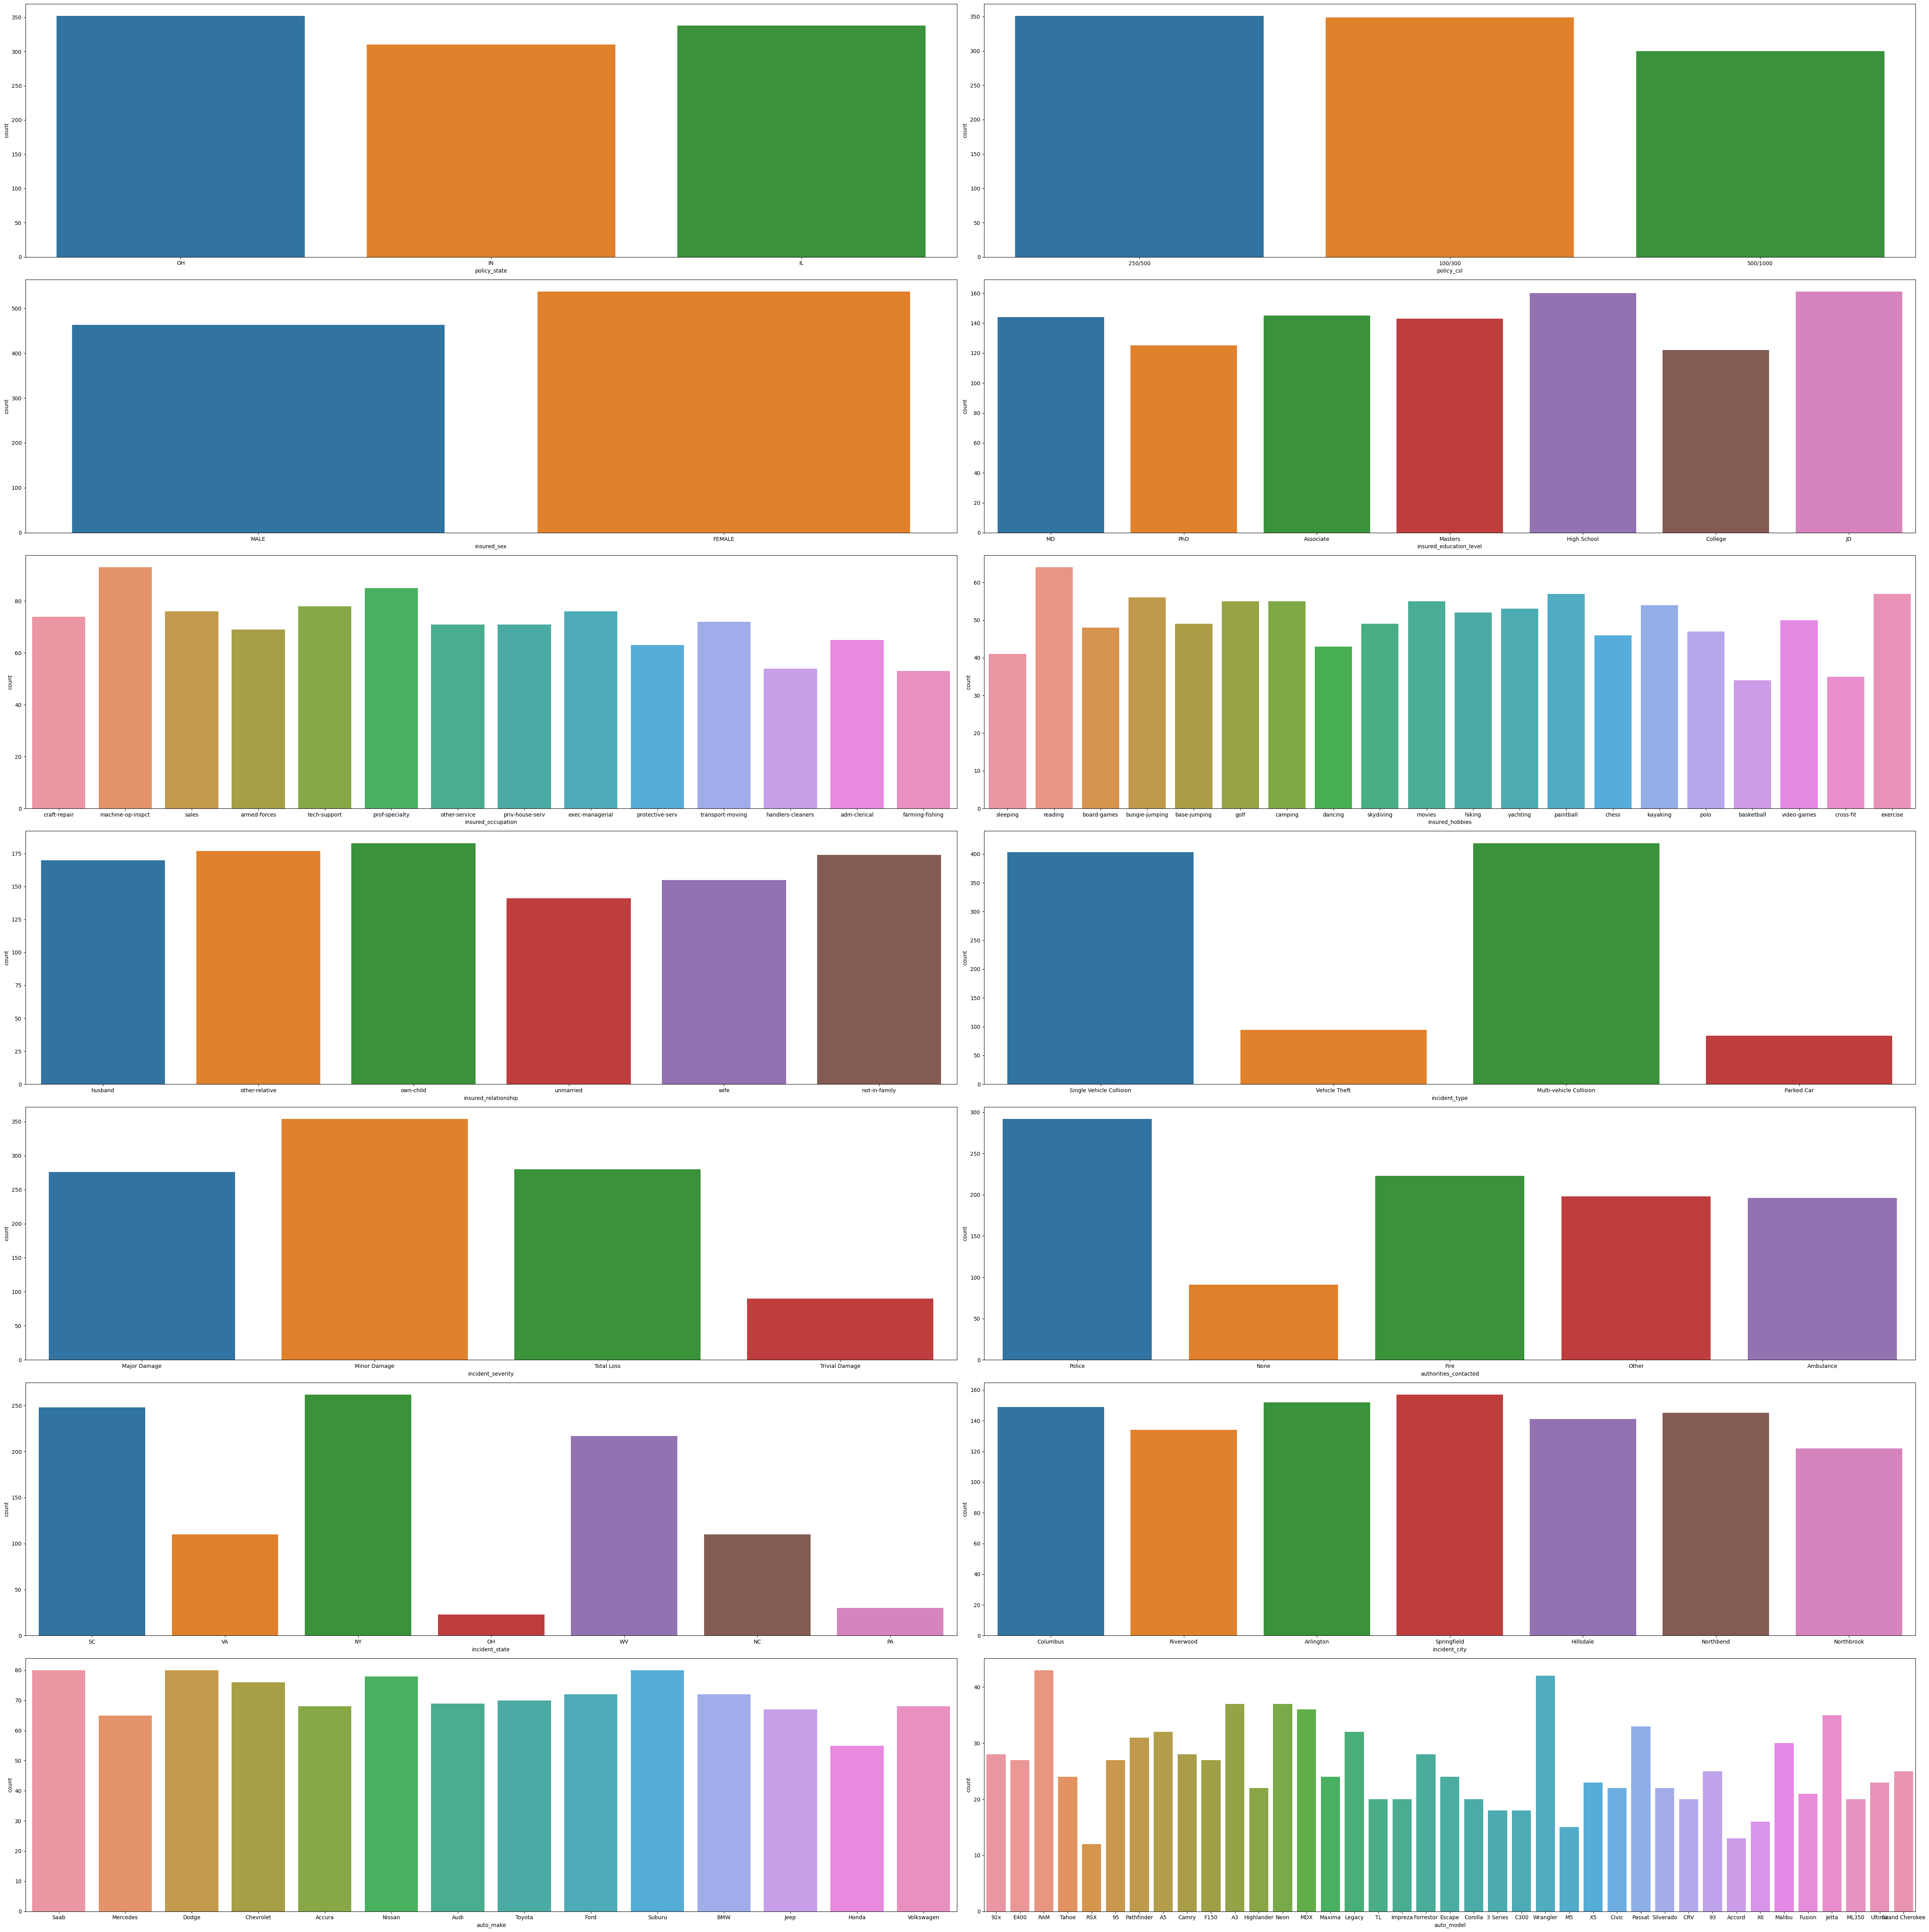

In [187]:
fig,ax = plt.subplots(nrows=7,ncols=2,figsize=(50,50))

for col,subplot in zip(X_cat.columns,ax.flatten()):
    sns.countplot(x=X_cat[col],ax=subplot)
plt.tight_layout()
plt.show()

In [188]:
le = LabelEncoder()

for i in X_cat.columns:
    label = le.fit_transform(X_cat[i])
    X_cat[i] = label
X_cat.head(2)

policy_state  policy_csl  insured_sex  insured_education_level  \
0             2           1            1                        4   
1             1           1            1                        4   

   insured_occupation  insured_hobbies  insured_relationship  incident_type  \
0                   2               17                     0              2   
1                   6               15                     2              3   

   incident_severity  authorities_contacted  incident_state  incident_city  \
0                  0                      4               4              1   
1                  1                      4               5              5   

   auto_make  auto_model  
0         10           1  
1          8          12

In [189]:
X_num.head(2)

months_as_customer  age  policy_number  policy_deductable  \
0                 328   48         521585               1000   
1                 228   42         342868               2000   

   policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                1406.91               0       466132          53300   
1                1197.22         5000000       468176              0   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1             0                         8                            1   

   bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0                1          2               71610          6510   
1                0          0                5070           780   

   property_claim  vehicle_claim  auto_year  
0           13020          52080       2004  
1             780           3510       2007

In [190]:
# normalize the 

In [191]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(scaled,columns=X_num.columns)
X_num_scaled.head()

months_as_customer       age  policy_number  policy_deductable  \
0            1.078140  0.990836      -0.095953          -0.222383   
1            0.208995  0.334073      -0.791527           1.412784   
2           -0.608002 -1.088913       0.550566           1.412784   
3            0.452355  0.224613      -1.239334           1.412784   
4            0.208995  0.552994      -0.695834          -0.222383   

   policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0               0.616705       -0.479476    -0.489529       1.011331   
1              -0.242521        1.697980    -0.461008      -0.901927   
2               0.642233        1.697980    -0.984885       0.358023   
3               0.652886        2.133471     1.491682       0.853388   
4               1.341980        2.133471     1.527808       1.467210   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0      0.953851                 -0.956261                    -0.823865   
1      0.953851                 -0.524475                    -0.823865   
2      0.953851                 -0.668404                     1.140056   
3     -1.267577                 -0.956261                    -0.823865   
4     -0.683741                  1.202666                    -0.823865   

   bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0         0.009759   0.461838            0.714257     -0.189283   
1        -1.210174  -1.338700           -1.807312     -1.363822   
2         1.229693   1.362107           -0.686362      0.054644   
3         0.009759   0.461838            0.403135     -0.224130   
4        -1.210174  -0.438431           -1.753121     -1.257232   

   property_claim  vehicle_claim  auto_year  
0        1.165505       0.749653  -0.183440  
1       -1.372696      -1.823346   0.315491  
2       -0.736072      -0.785565   0.315491  
3       -0.219722       0.677607   1.479664  
4       -1.399654      -1.768252   0.648112

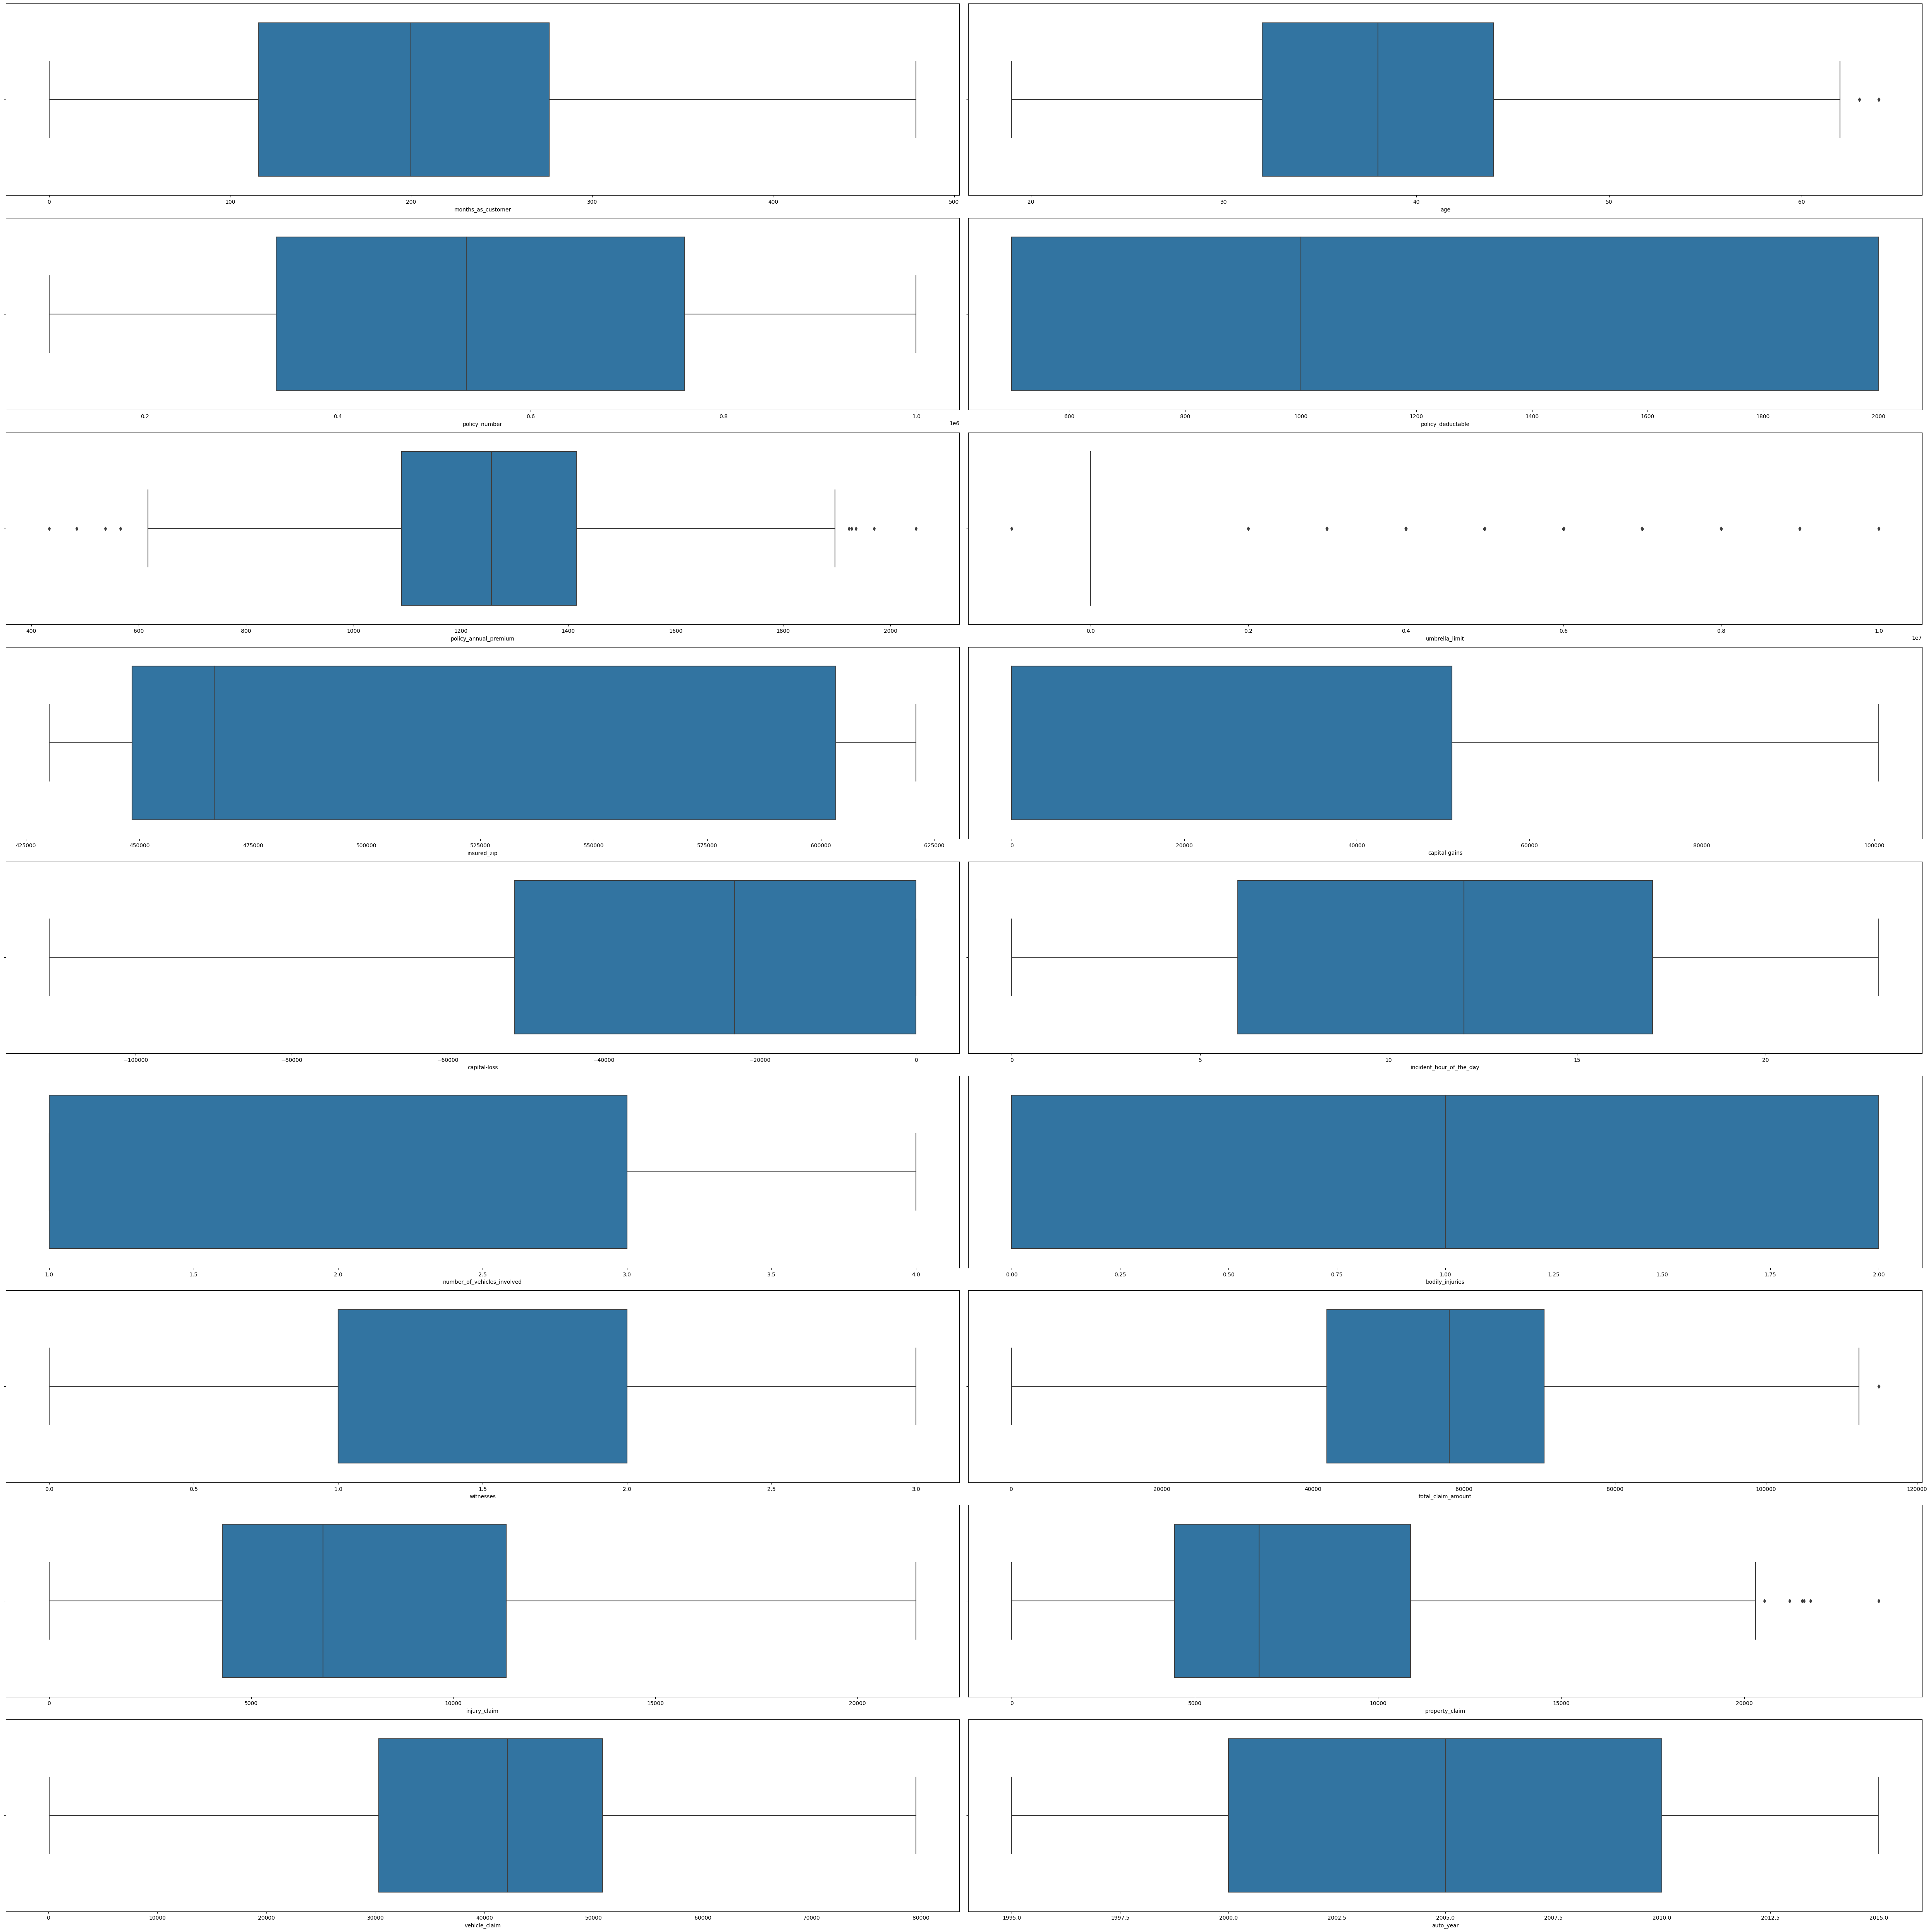

In [192]:
fig,ax = plt.subplots(nrows=9,ncols=2,figsize=(50,50),squeeze=True)

for col,subplot in zip(X_num.columns,ax.flatten()):
    sns.boxplot(x=X_num[col],ax=subplot)
plt.tight_layout()
plt.show()

In [193]:
# There are outliers present in the numerical 

In [194]:
X_num_scaled.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [195]:
# umbrella_limit column is right skewed

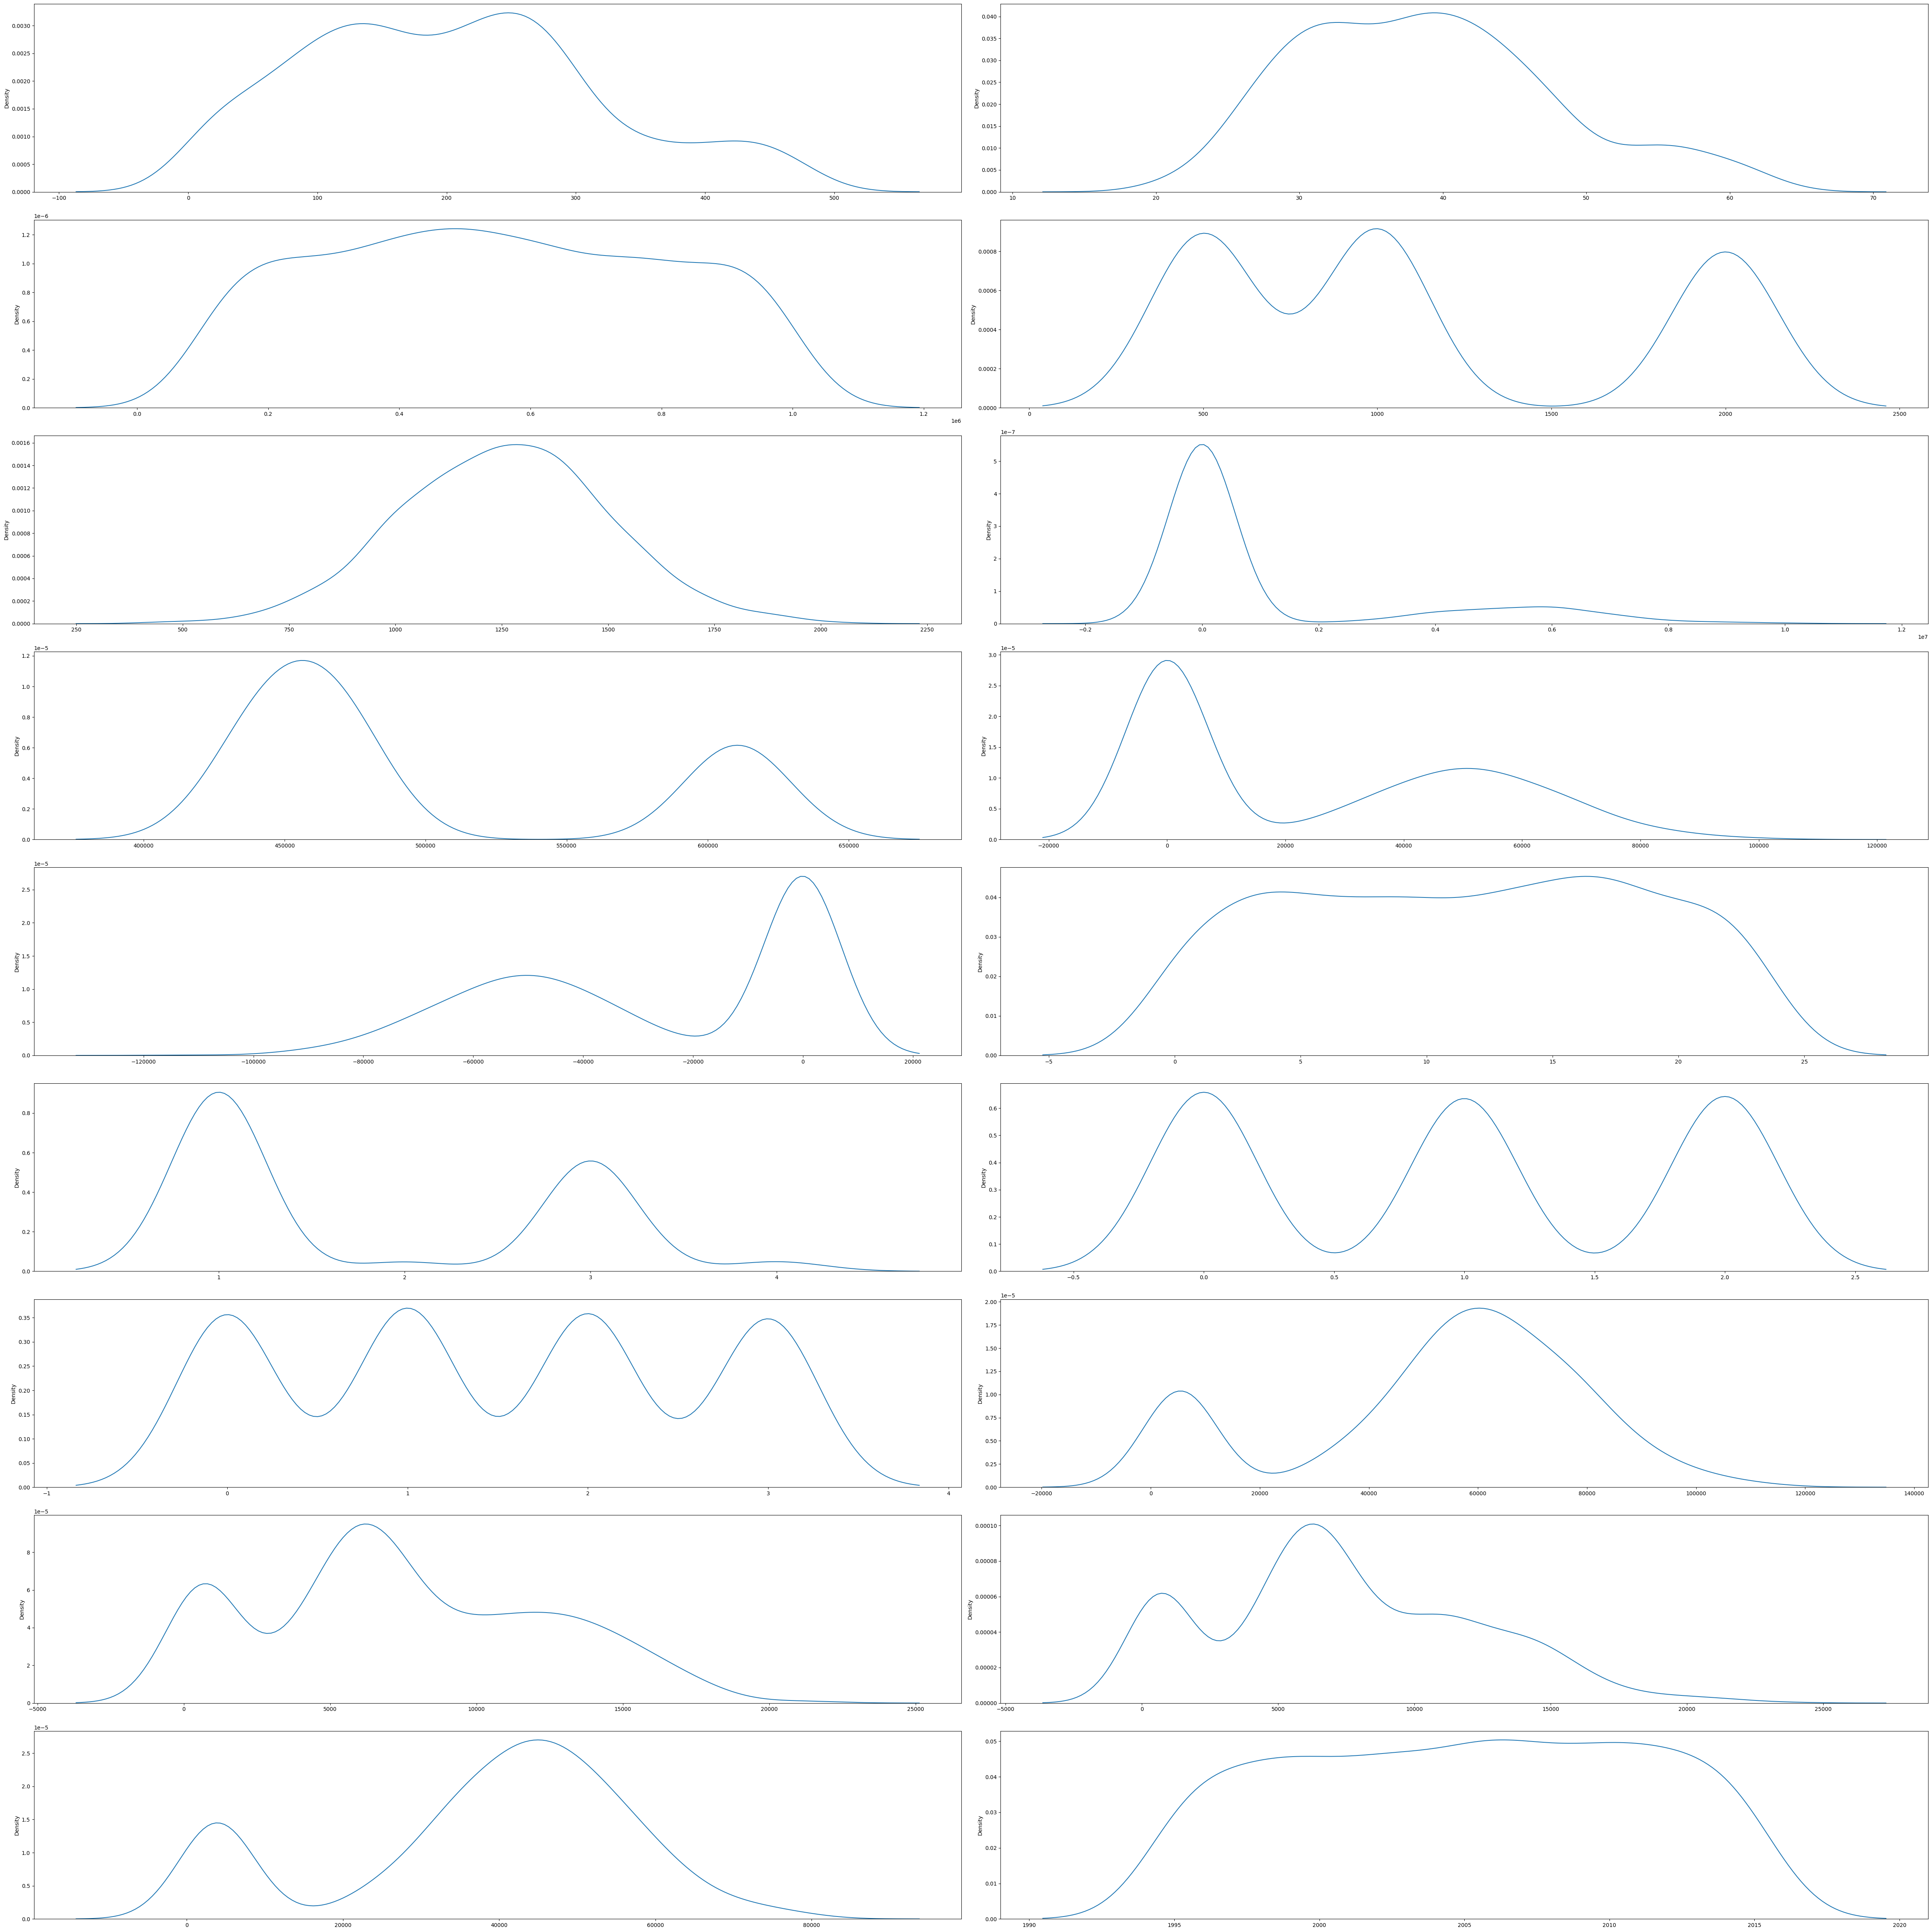

In [196]:
fig,ax = plt.subplots(nrows=9,ncols=2,figsize=(50,50),squeeze=True)

for col,subplot in zip(X_num.columns,ax.flatten()):
    sns.distplot(x=X_num[col],ax=subplot,hist=False)
plt.tight_layout()
plt.show()

In [197]:
X_new = pd.concat([X_num_scaled,X_cat],axis=1)
X_new.head()

months_as_customer       age  policy_number  policy_deductable  \
0            1.078140  0.990836      -0.095953          -0.222383   
1            0.208995  0.334073      -0.791527           1.412784   
2           -0.608002 -1.088913       0.550566           1.412784   
3            0.452355  0.224613      -1.239334           1.412784   
4            0.208995  0.552994      -0.695834          -0.222383   

   policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0               0.616705       -0.479476    -0.489529       1.011331   
1              -0.242521        1.697980    -0.461008      -0.901927   
2               0.642233        1.697980    -0.984885       0.358023   
3               0.652886        2.133471     1.491682       0.853388   
4               1.341980        2.133471     1.527808       1.467210   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0      0.953851                 -0.956261                    -0.823865   
1      0.953851                 -0.524475                    -0.823865   
2      0.953851                 -0.668404                     1.140056   
3     -1.267577                 -0.956261                    -0.823865   
4     -0.683741                  1.202666                    -0.823865   

   bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0         0.009759   0.461838            0.714257     -0.189283   
1        -1.210174  -1.338700           -1.807312     -1.363822   
2         1.229693   1.362107           -0.686362      0.054644   
3         0.009759   0.461838            0.403135     -0.224130   
4        -1.210174  -0.438431           -1.753121     -1.257232   

   property_claim  vehicle_claim  auto_year  policy_state  policy_csl  \
0        1.165505       0.749653  -0.183440             2           1   
1       -1.372696      -1.823346   0.315491             1           1   
2       -0.736072      -0.785565   0.315491             2           0   
3       -0.219722       0.677607   1.479664             0           1   
4       -1.399654      -1.768252   0.648112             0           2   

   insured_sex  insured_education_level  insured_occupation  insured_hobbies  \
0            1                        4                   2               17   
1            1                        4                   6               15   
2            0                        6                  11                2   
3            0                        6                   1                2   
4            1                        0                  11                2   

   insured_relationship  incident_type  incident_severity  \
0                     0              2                  0   
1                     2              3                  1   
2                     3              0                  1   
3                     4              2                  0   
4                     4              3                  1   

   authorities_contacted  incident_state  incident_city  auto_make  auto_model  
0                      4               4              1         10           1  
1                      4               5              5          8          12  
2                      4               1              1          4          30  
3                      4               2              0          3          34  
4                      2               1              0          0          31

In [198]:
df_insurance_claims_new = pd.concat([X_new,y],axis=1)
df_insurance_claims_new.head(2)

months_as_customer       age  policy_number  policy_deductable  \
0            1.078140  0.990836      -0.095953          -0.222383   
1            0.208995  0.334073      -0.791527           1.412784   

   policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0               0.616705       -0.479476    -0.489529       1.011331   
1              -0.242521        1.697980    -0.461008      -0.901927   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0      0.953851                 -0.956261                    -0.823865   
1      0.953851                 -0.524475                    -0.823865   

   bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0         0.009759   0.461838            0.714257     -0.189283   
1        -1.210174  -1.338700           -1.807312     -1.363822   

   property_claim  vehicle_claim  auto_year  policy_state  policy_csl  \
0        1.165505       0.749653  -0.183440             2           1   
1       -1.372696      -1.823346   0.315491             1           1   

   insured_sex  insured_education_level  insured_occupation  insured_hobbies  \
0            1                        4                   2               17   
1            1                        4                   6               15   

   insured_relationship  incident_type  incident_severity  \
0                     0              2                  0   
1                     2              3                  1   

   authorities_contacted  incident_state  incident_city  auto_make  \
0                      4               4              1         10   
1                      4               5              5          8   

   auto_model  fraud_reported  
0           1               1  
1          12               1

In [199]:
df_insurance_claims_new.corr()

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_year                             -0.000292  0.001354      -0.000183   
policy_state                          -0.000328 -0.014533       0.072815   
policy_csl                            -0.026819 -0.015185       0.038917   
insured_sex                            0.060925  0.073337       0.004564   
insured_education_level               -0.000833  0.000969      -0.037264   
insured_occupation                     0.009814  0.017220      -0.014422   
insured_hobbies                       -0.093661 -0.081315       0.039896   
insured_relationship                   0.069727  0.074832       0.017120   
incident_type                         -0.017377 -0.025626       0.001742   
incident_severity                     -0.059581 -0.058439      -0.015719   
authorities_contacted                  0.010021  0.015417       0.018565   
incident_state                         0.005369  0.005770      -0.010064   
incident_city                         -0.000130 -0.002291      -0.035406   
auto_make                              0.047655  0.030410       0.023860   
auto_model                             0.004202  0.017343       0.065240   
fraud_reported                         0.020544  0.012143      -0.029443   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_number                        -0.006738               0.022566   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_zip                           0.004545               0.032354   
capital-gains                         0.035212              -0.013738   
capital-loss                         -0.023544               0.023547   
incident_hour_of_the_day              0.060935              -0.001578   
number_of_vehicles_involved           0.051214              -0.045991   
bodily_injuries                      -0.022765               0.026780   
witnesses                             0.066639               0.002332   
total_claim_amount                    0.022839               0.009094   
injury_claim                          0.039107              -0.017633   
property_claim                        0.064792              -0.011654   
vehicle_claim                         0.005269               0.020246   
auto_year                             0.026105              -0.049226   
policy_state                          0.010033           

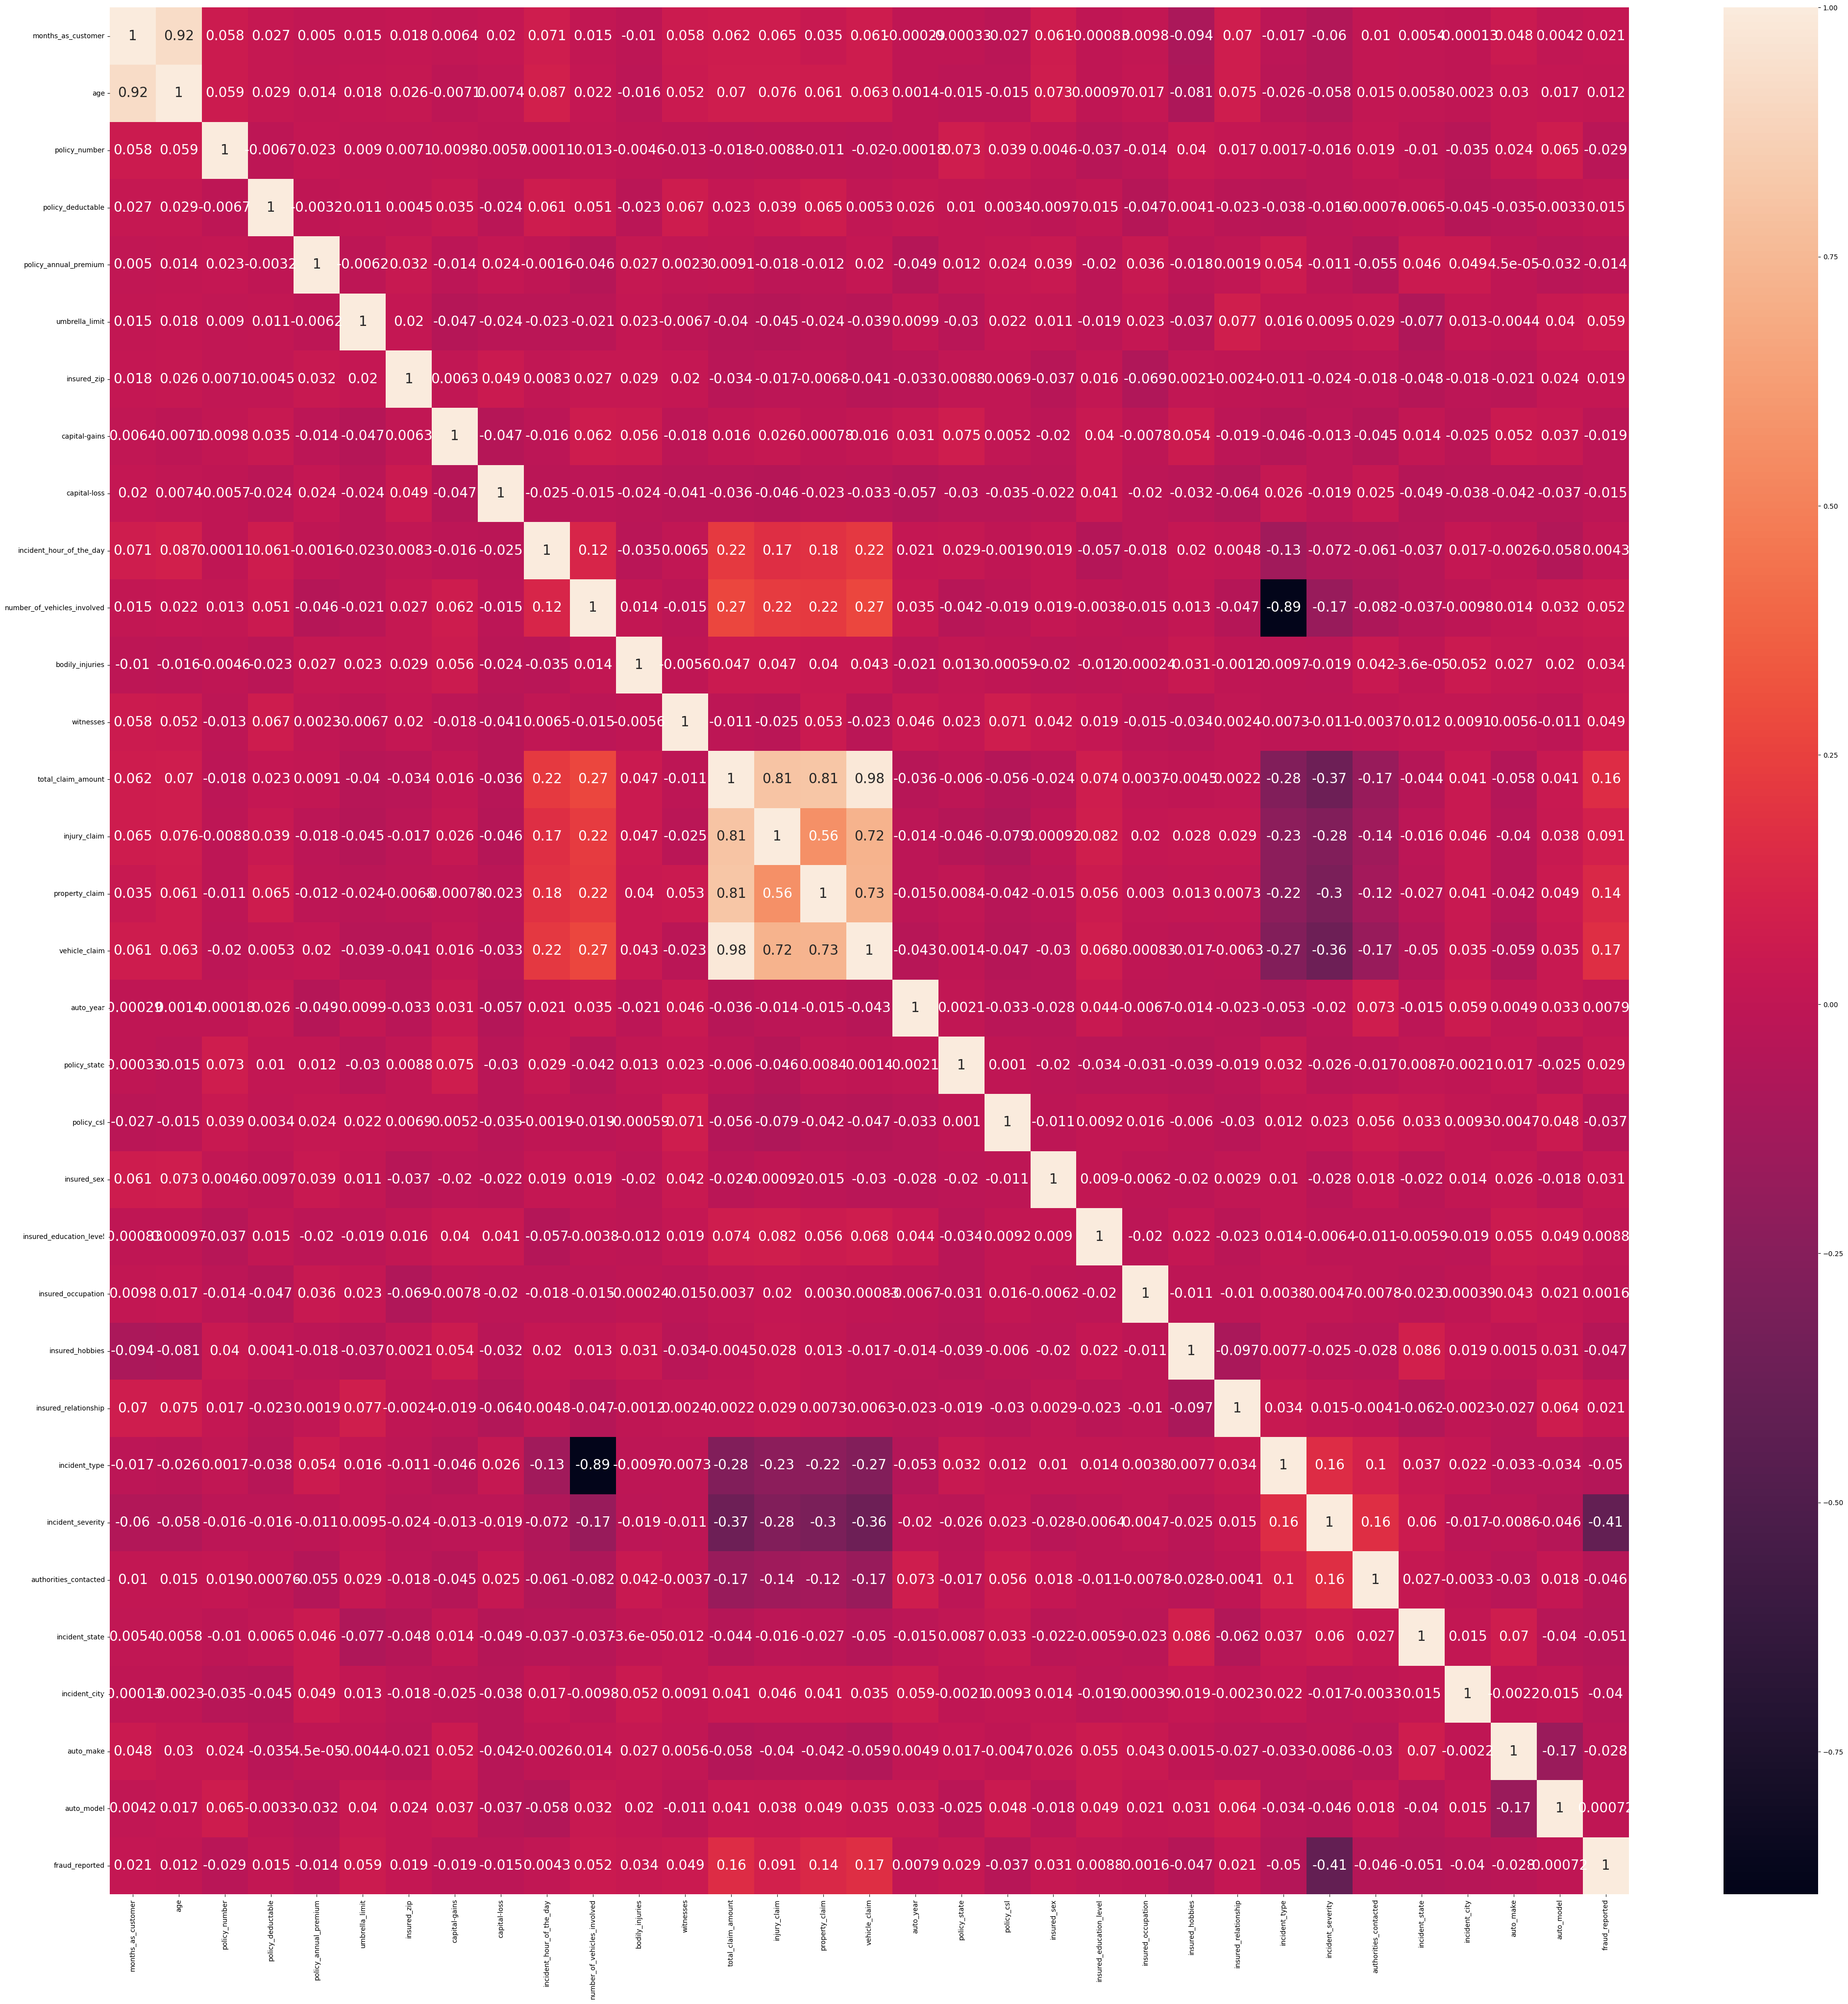

In [200]:
plt.figure(figsize=(50,50))
sns.heatmap(df_insurance_claims_new.corr(),annot=True,fmt='.2g',annot_kws={'size':20});

In [201]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_new.values,i) for i in range(X_new.shape[1])]
vif['Feature'] = X_new.columns
vif.sort_values(by='VIF',ascending=False)

VIF                      Feature
16       inf                vehicle_claim
13       inf           total_claim_amount
15       inf               property_claim
14       inf                 injury_claim
25  9.380414                incident_type
1   6.837509                          age
0   6.829629           months_as_customer
10  4.391018  number_of_vehicles_involved
31  3.854973                   auto_model
23  3.774249              insured_hobbies
22  3.482443           insured_occupation
30  3.473869                    auto_make
21  3.276195      insured_education_level
28  3.225535               incident_state
27  3.094059        authorities_contacted
29  3.018501                incident_city
26  2.932192            incident_severity
24  2.906348         insured_relationship
18  2.390179                 policy_state
19  2.388069                   policy_csl
20  1.865063                  insured_sex
9   1.085683     incident_hour_of_the_day
17  1.038139                    auto_year
12  1.035938                    witnesses
7   1.030741                capital-gains
8   1.030389                 capital-loss
3   1.029823            policy_deductable
4   1.026982        policy_annual_premium
6   1.024740                  insured_zip
5   1.023301               umbrella_limit
2   1.022800                policy_number
11  1.019074              bodily_injuries

In [205]:
vif = pd.DataFrame()
X_new_vif = X_new.drop(['vehicle_claim','incident_type','age','total_claim_amount'],axis=1)
vif['VIF'] = [variance_inflation_factor(X_new_vif.values,i) for i in range(X_new_vif.shape[1])]
vif['Feature'] = X_new_vif.columns
vif.sort_values(by='VIF',ascending=False)

VIF                      Feature
27  3.799357                   auto_model
20  3.654439              insured_hobbies
26  3.443237                    auto_make
19  3.435464           insured_occupation
18  3.206335      insured_education_level
24  3.190653               incident_state
23  3.023592        authorities_contacted
25  2.955827                incident_city
21  2.861907         insured_relationship
22  2.854447            incident_severity
16  2.374472                   policy_csl
15  2.351002                 policy_state
17  1.827445                  insured_sex
12  1.571773                 injury_claim
13  1.567493               property_claim
9   1.099995  number_of_vehicles_involved
8   1.071052     incident_hour_of_the_day
0   1.040736           months_as_customer
14  1.031266                    auto_year
6   1.029948                capital-gains
11  1.029579                    witnesses
7   1.026630                 capital-loss
4   1.023069               umbrella_limit
3   1.021836        policy_annual_premium
1   1.021427                policy_number
2   1.021292            policy_deductable
10  1.018598              bodily_injuries
5   1.017272                  insured_zip

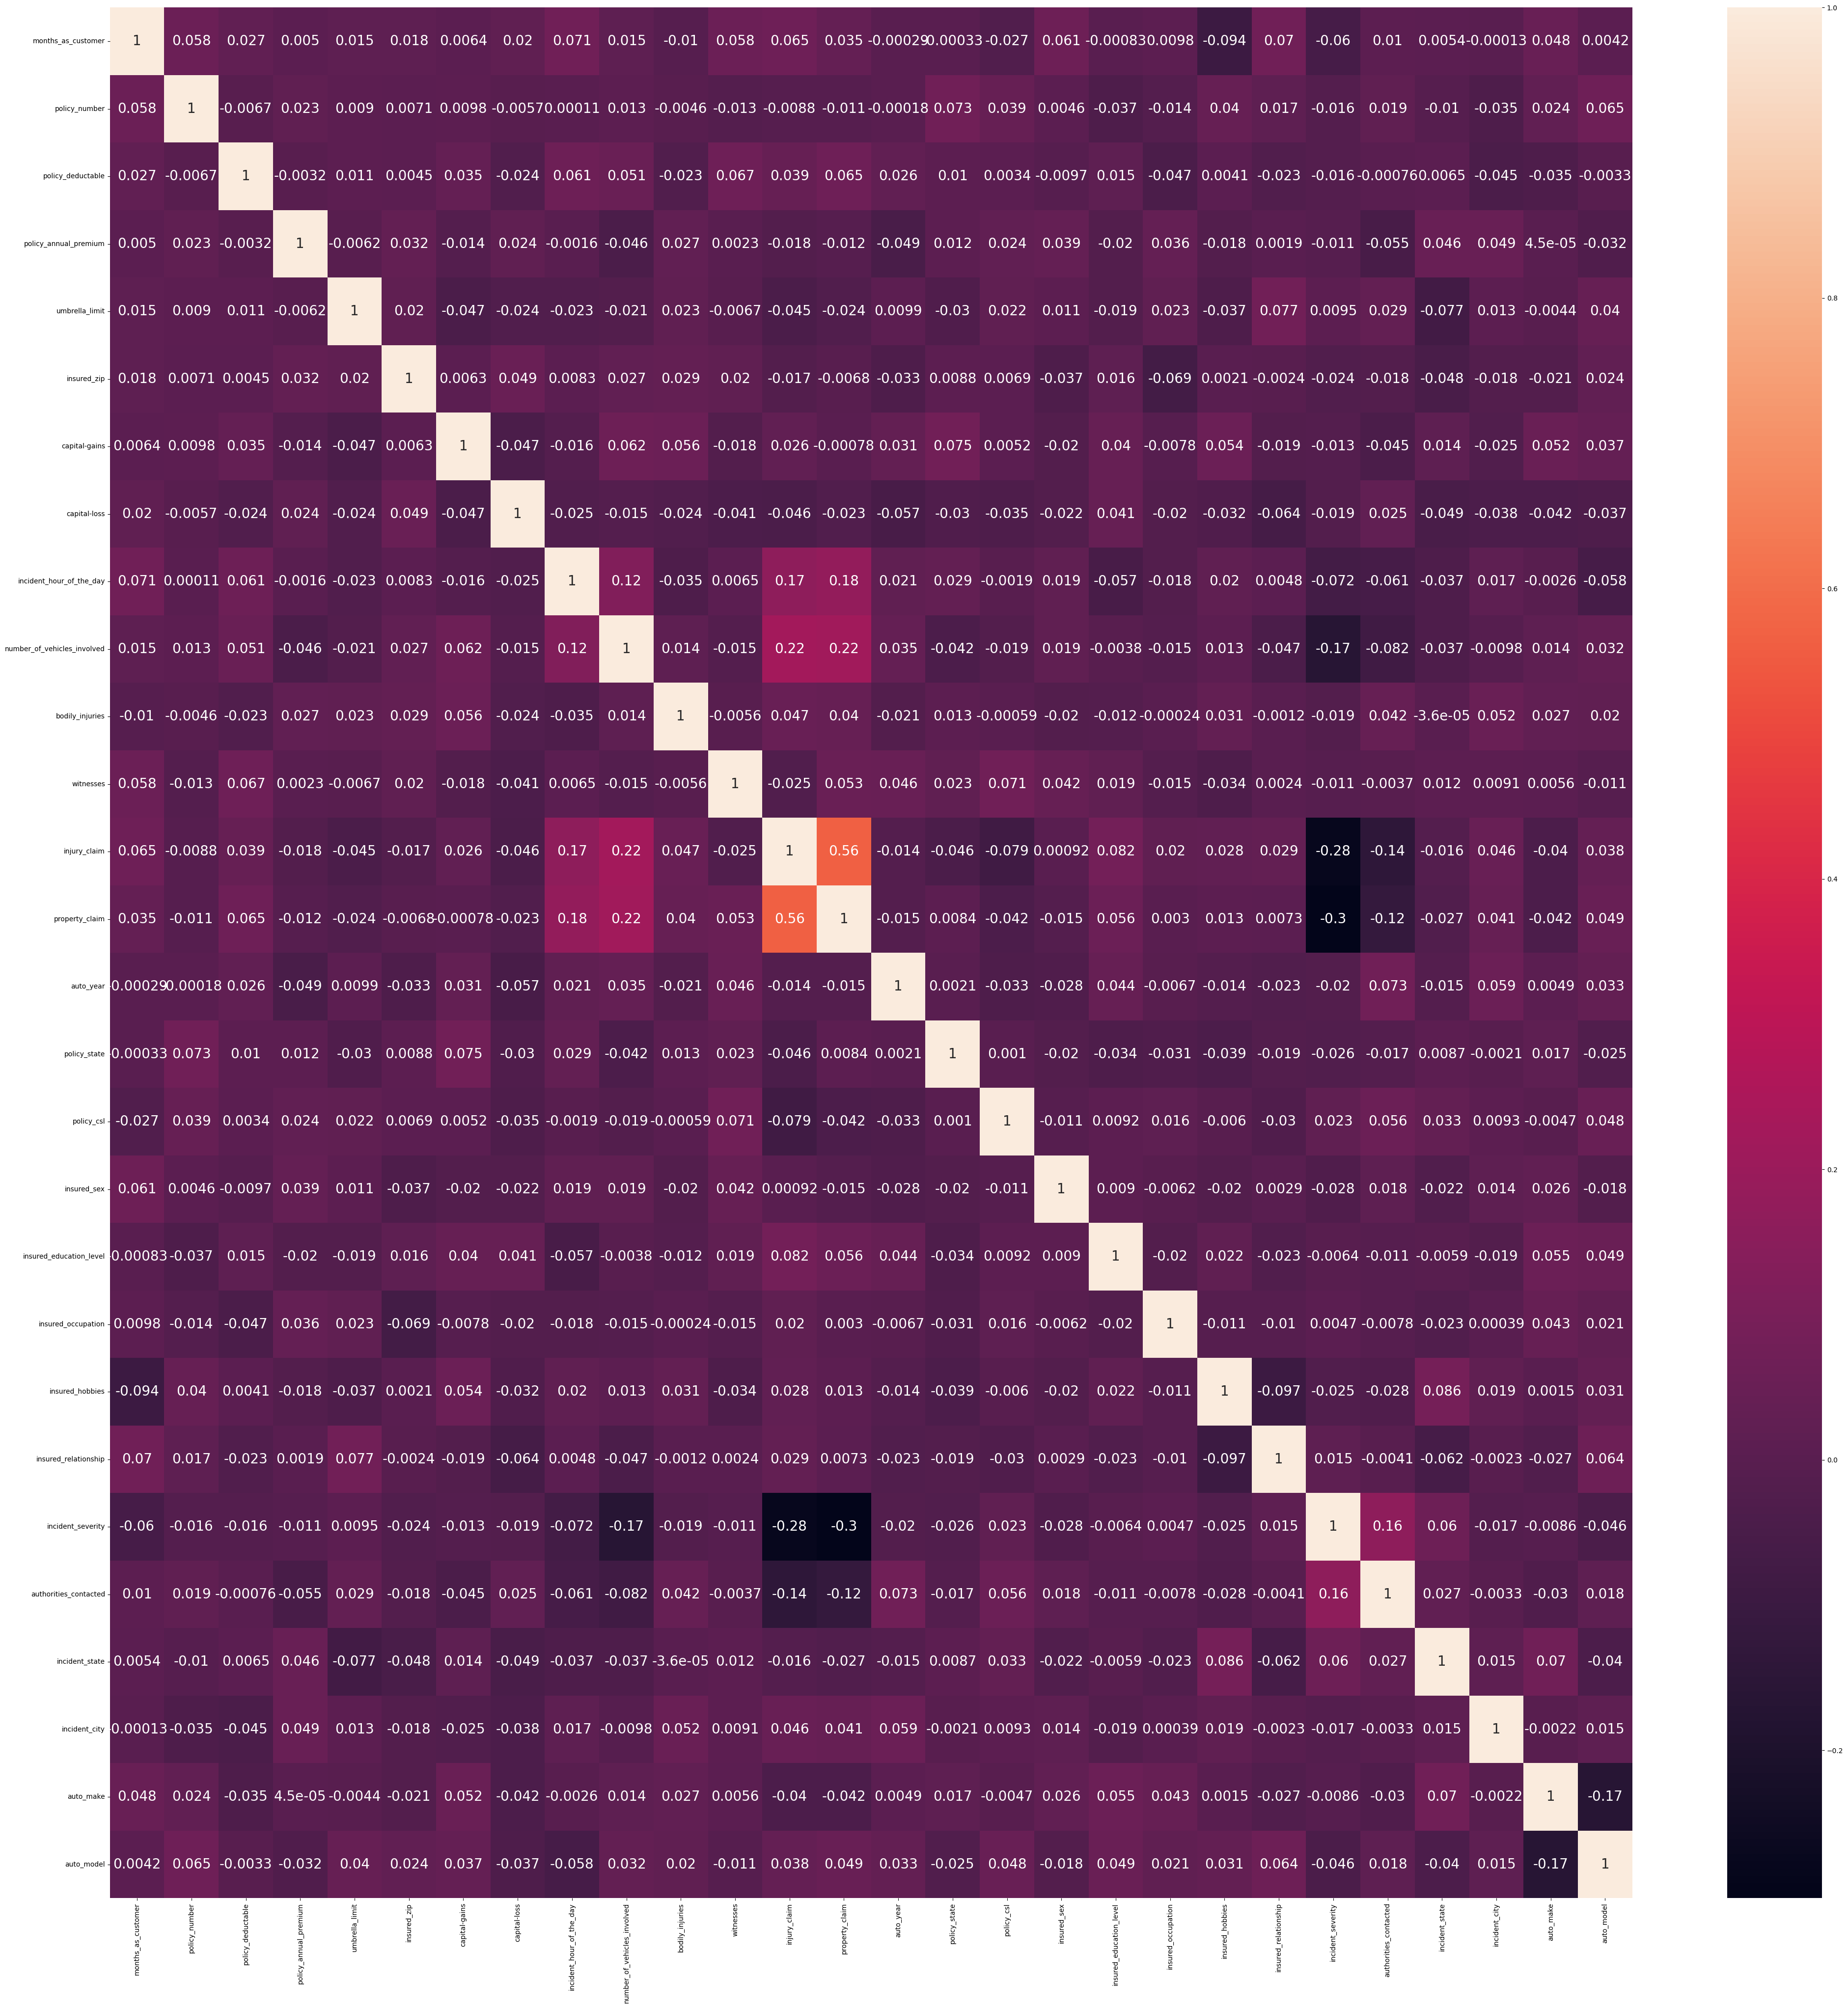

In [206]:
plt.figure(figsize=(50,50))
sns.heatmap(X_new_vif.corr(),annot=True,fmt='.2g',annot_kws={'size':20});

In [208]:
# Split Train and test 
X_train,X_test,y_train,y_test = train_test_split(X_new_vif,y,random_state=10,test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 28)
(200, 28)
(800,)
(200,)


In [210]:
logit = sm.Logit(y_train,X_train).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.440349
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         fraud_reported   No. Observations:                  800
Model:                          Logit   Df Residuals:                      772
Method:                           MLE   Df Model:                           27
Date:                Mon, 13 Mar 2023   Pseudo R-squ.:                  0.2131
Time:                        16:12:51   Log-Likelihood:                -352.28
converged:                       True   LL-Null:                       -447.66
Covariance Type:            nonrobust   LLR p-value:                 1.405e-26
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
months_as_customer             -0.0126      0.092     -0.138      0.891      -0.192       0.167
policy_number                  -0.0672      0.097     -0.696      0.487      -0.257       0.122
policy_deductable              -0.0196      0.094     -0.209      0.834      -0.204       0.164
policy_annual_premium           0.0035      0.098      0.035      0.972      -0.189       0.196
umbrella_limit                  0.1586      0.091      1.745      0.081      -0.020       0.337
insured_zip                     0.0294      0.095      0.308      0.758      -0.157       0.216
capital-gains                  -0.0842      0.095     -0.890      0.373      -0.269       0.101
capital-loss                   -0.1632      0.095     -1.711      0.087      -0.350       0.024
incident_hour_of_the_day       -0.0423      0.098     -0.432      0.666      -0.235       0.150
number_of_vehicles_involved    -0.0200      0.095     -0.209      0.834      -0.207       0.167
bodily_injuries                 0.0679      0.095      0.711      0.477      -0.119       0.255
witnesses                       0.0909      0.096      0.948      0.343      -0.097       0.279
injury_claim                   -0.0056      0.114     -0.050      0.960      -0.228       0.217
property_claim                  0.1160      0.110      1.053      0.292      -0.100       0.332
auto_year                      -0.0026      0.095     -0.028      0.978      -0.189       0.184
policy_state                    0.1464      0.110      1.334      0.182      -0.069       0.361
policy_csl                     -0.0316      0.116     -0.272      0.786      -0.259       0.196
insured_sex                     0.1108      0.187      0.594      0.553      -0.255       0.477
insured_education_level         0.0243      0.047      0.522      0.601      -0.067       0.115
insured_occupation              0.0021      0.022      0.094      0.925      -0.041       0.046
insured_hobbies                -0.0136      0.016     -0.866      0.386      -0.044       0.017
insured_relationship            0.0709      0.054      1.307      0.191      -0.035       0.177
incident_severity              -1.4211      0.134    -10.583      0.000      -1.684      -1.158
authorities_contacted           0.0783      0.061      1.291      0.197      -0.041       0.197
incident_state                 -0.0502      0.043     -1.164      0.245      -0.135       0.034
incident_city                  -0.0410      0.044     -0.921      0.357      -0.128       0.046
auto_make                      -0.0198      0.023     -0.870      0.384      -0.065       0.025
auto_model                      0.0013      0.008      0.165      0.869      -0.015       0.017
===============================================================================================
"""